# Load Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import decomposition
from tqdm import tqdm_notebook

- age — age in years
- sex — (1 = male; 0 = female)
- cp — chest pain type
- trestbps — resting blood pressure (in mm Hg on admission to the hospital)
- chol — serum cholestoral in mg/dl
- fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg — resting electrocardiographic results
- thalach — maximum heart rate achieved
- exang — exercise induced angina (1 = yes; 0 = no)
- oldpeak — ST depression induced by exercise relative to rest
- slope — the slope of the peak exercise ST segment
- ca — number of major vessels (0–3) colored by flourosopy
- thal — 3 = normal; 6 = fixed defect; 7 = reversable defect
- target — have disease or not (1=yes, 0=no)

# Load data

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


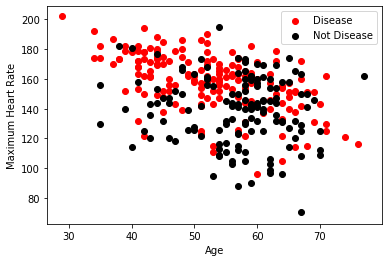

In [3]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)], c="black")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values
print(X.shape)
print(y.shape)

(303, 13)
(303,)


# Split data into train and test

In [5]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tuning for n 

In [6]:
param_list = [i for i in range(3,40)]
accuracy = []
error = {'n': [], 'accuracy': []}
for param in tqdm_notebook(param_list):
    classifier = KNeighborsClassifier(n_neighbors = param, p = 2)
    classifier = classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    error['n'].append(param)
    error['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
error = pd.DataFrame(error)
error

,n,accuracy
0,3,0.836066
1,4,0.852459
2,5,0.819672
3,6,0.836066
4,7,0.836066
5,8,0.852459
6,9,0.852459
7,10,0.885246
8,11,0.819672
9,12,0.819672


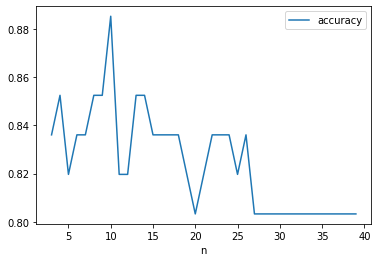

In [7]:
ax = plt.gca()
error.plot(kind='line',x='n',y='accuracy',ax=ax)
plt.show()

In [8]:
temp = error[error['accuracy'] == error['accuracy'].max()]
n_opt = temp['n'].values[0]
print('Tuning N:'+str(n_opt))

Tuning N:10


# Final Model

In [9]:
classifier = KNeighborsClassifier(n_neighbors = n_opt, p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
error = metrics.accuracy_score(y_test, y_pred)
error

0.8852459016393442

In [10]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [11]:
print("There are "+str(cm[0][0])+" and "+str(cm[1][1])+ " correct predictions.")
print("There are "+str(cm[0][1])+" and "+str(cm[1][0])+ " error predictions")

There are 24 and 30 correct predictions.
There are 3 and 4 error predictions
